# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Perform API Calls
#Perform weather check on each city using a series of successive API calls
#Include a print log of each city as it's being process (with the city number and name)
#setup lists to hold response info
record = 0
sets = 1
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#response = requests.get(query_url + city).json()
#get list of cities and perform a request for data on each
for city in cities:
    record += 1
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city
    
    try:
        response = requests.get(query)
        city_json = response.json()
        cityname.append(city_json['name'])
        cloudiness.append(city_json['clouds']['all'])
        country.append(city_json['sys']['country'])
        date.append(city_json['dt'])
        humidity.append(city_json['main']['humidity'])
        lat.append(city_json['coord']['lat'])
        lng.append(city_json['coord']['lon'])
        max_temp.append(city_json['main']['temp_max'])
        wind_speed.append(city_json['wind']['speed'])
        if record == 50:
            sets = sets + 1
            record = 0
        print(f'Processing record {record} of Set {sets} | {city}')
    except:
        print(f"City not found. Skipping...")
        
print("End of data")
 


City not found. Skipping...
Processing record 2 of Set 1 | ghanzi
Processing record 3 of Set 1 | bredasdorp
Processing record 4 of Set 1 | ushuaia
Processing record 5 of Set 1 | margate
Processing record 6 of Set 1 | bethel
Processing record 7 of Set 1 | pochutla
Processing record 8 of Set 1 | lashio
Processing record 9 of Set 1 | butaritari
Processing record 10 of Set 1 | nioro
Processing record 11 of Set 1 | vangaindrano
City not found. Skipping...
Processing record 13 of Set 1 | ancud
Processing record 14 of Set 1 | busselton
Processing record 15 of Set 1 | touros
Processing record 16 of Set 1 | mnogovershinnyy
Processing record 17 of Set 1 | pacific grove
Processing record 18 of Set 1 | novyy urengoy
Processing record 19 of Set 1 | bluff
Processing record 20 of Set 1 | georgetown
Processing record 21 of Set 1 | yar-sale
Processing record 22 of Set 1 | sinnamary
Processing record 23 of Set 1 | fortuna
Processing record 24 of Set 1 | rikitea
Processing record 25 of Set 1 | kapaa
Proc

Processing record 8 of Set 5 | flinders
Processing record 9 of Set 5 | belawan
Processing record 10 of Set 5 | manaia
Processing record 11 of Set 5 | cayenne
Processing record 12 of Set 5 | san patricio
Processing record 13 of Set 5 | ahuimanu
City not found. Skipping...
Processing record 15 of Set 5 | drayton valley
Processing record 16 of Set 5 | cabo san lucas
Processing record 17 of Set 5 | rincon de la victoria
Processing record 18 of Set 5 | kalmar
Processing record 19 of Set 5 | cerrito
Processing record 20 of Set 5 | vanavara
Processing record 21 of Set 5 | normandin
Processing record 22 of Set 5 | north bend
City not found. Skipping...
Processing record 24 of Set 5 | kahului
Processing record 25 of Set 5 | sao filipe
Processing record 26 of Set 5 | hasaki
Processing record 27 of Set 5 | bastia
Processing record 28 of Set 5 | morehead
Processing record 29 of Set 5 | upernavik
Processing record 30 of Set 5 | at-bashi
Processing record 31 of Set 5 | mao
Processing record 32 of Se

Processing record 13 of Set 9 | ilo
Processing record 14 of Set 9 | mazamari
Processing record 15 of Set 9 | lannion
Processing record 16 of Set 9 | champua
Processing record 17 of Set 9 | cuauhtemoc
Processing record 18 of Set 9 | maragogi
Processing record 19 of Set 9 | zlatoust
Processing record 20 of Set 9 | tautira
Processing record 21 of Set 9 | praia
City not found. Skipping...
City not found. Skipping...
Processing record 24 of Set 9 | pemba
Processing record 25 of Set 9 | verkhnevilyuysk
Processing record 26 of Set 9 | kasempa
Processing record 27 of Set 9 | bilma
Processing record 28 of Set 9 | vostok
Processing record 29 of Set 9 | limulan
Processing record 30 of Set 9 | opuwo
Processing record 31 of Set 9 | seoul
Processing record 32 of Set 9 | katsuura
Processing record 33 of Set 9 | christchurch
Processing record 34 of Set 9 | juneau
Processing record 35 of Set 9 | pedro ii
Processing record 36 of Set 9 | jimma
Processing record 37 of Set 9 | naziya
City not found. Skippi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Turn appended lists into dictionary
weather_dict = {'City':cityname,
                'Cloudiness':cloudiness,
                'Country':country,
                'Date':date,
                'Humidity':humidity,
                'Latitude':lat,
                'Longitude':lng,
                'Max Temp':max_temp,
                'Wind Speed':wind_speed}

weather_df = pd.DataFrame(weather_dict)

In [8]:
#export dataframe to csv
weather_df.to_csv('city_weather.csv', index = None, header = True)
#weather_df.to_csv(r'\my_weather_data.csv)


In [9]:
#counts for dataframe
weather_df.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Latitude      556
Longitude     556
Max Temp      556
Wind Speed    556
dtype: int64

In [10]:
#Display Dataframe head
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Ghanzi,68,BW,1618589359,26,-21.5667,21.7833,78.93,7.58
1,Bredasdorp,0,ZA,1618589360,59,-34.5322,20.0403,64.40,21.85
2,Ushuaia,40,AR,1618589259,70,-54.8000,-68.3000,44.60,34.52
3,Margate,5,GB,1618589360,53,51.3813,1.3862,48.00,7.00
4,Bethel,90,US,1618589361,70,41.3712,-73.4140,44.60,6.91
5,Pochutla,1,MX,1618589361,35,15.7432,-96.4661,90.00,11.50
6,Lashio,100,MM,1618589361,56,22.9333,97.7500,71.28,0.98
7,Butaritari,100,KI,1618589362,74,3.0707,172.7902,81.07,5.70
8,Nioro,63,GM,1618589362,10,13.3500,-15.7500,104.95,5.93
9,Vangaindrano,42,MG,1618589362,87,-23.3500,47.6000,75.40,5.84


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

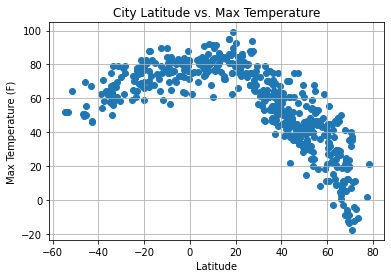

In [48]:
#Build scatter plot Temperature vs Latitude
#save the figure as .pngs
#show plot

scatlat = weather_df["Latitude"]
scattemp = weather_df["Max Temp"]

plt.scatter(scatlat,scattemp)
plt.grid()
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('LatitudeMaxTemp.png')
plt.show()

#This plot shows the relationship between latitude and temperature in cities. The chart shows the cities close to the equator
#have a higher temperature. The farther away from the equator the lower the temperature.

## Latitude vs. Humidity Plot

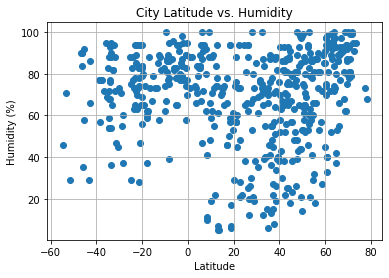

In [50]:
#Build the scatter plot for latitude vs humidity
#Save the figure
#Show plot

#scatlat = weather_df["Latitude"]
scathum = weather_df["Humidity"]

plt.scatter(scatlat,scathum)
plt.grid()
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('LatitudeHumidity.png')
plt.show()

#This plot shows the latitide and humidity in selected cities. 
#The humidity varies 20-40 latitude with a gradual increase to a higher humidity the higher the latitude. 

## Latitude vs. Cloudiness Plot

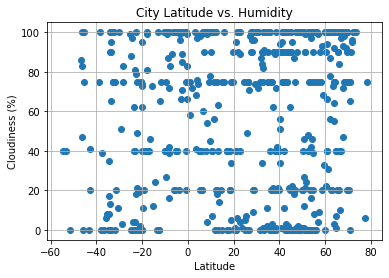

In [51]:
#Build the scatter plot for latitude vs cloudiness
#Save the figure
#Show plot

#scatlat = weather_df["Latitude"]
scatcloud = weather_df["Cloudiness"]

plt.scatter(scatlat,scatcloud)
plt.grid()
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('LatitudeCloudiness.png')
plt.show()

#This plot shows the latitude and cloudiness n selected cities. 
#Latitude does not seem to affect cloudiness. 

## Latitude vs. Wind Speed Plot

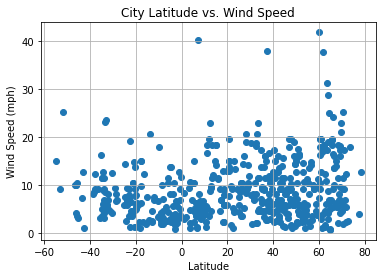

In [53]:
#Build the scatter plot for latitude vs humidity
#Save the figure
#Show plot

#scatlat = weather_df["Latitude"]
scatwind = weather_df["Wind Speed"]

plt.scatter(scatlat,scatwind)
plt.grid()
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('LatitudeWindSpeed.png')
plt.show()

#This plot shows the latitide and wind speed in selected cities. 
#The wind speed is stronger the higher the latitude.

## Linear Regression

In [12]:
#Set up Northern and Southern Hemisphere Dataframes

#Northern Hemisphere (Lat >= 0)
weather_df_north = weather_df[weather_df['Latitude'] >= 0]

#Southern Hemisphere (Lat < 0)
weather_df_south = weather_df[weather_df['Latitude'] < 0]

weather_df_north.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
3,Margate,5,GB,1618589360,53,51.3813,1.3862,48.00,7.00
4,Bethel,90,US,1618589361,70,41.3712,-73.4140,44.60,6.91
5,Pochutla,1,MX,1618589361,35,15.7432,-96.4661,90.00,11.50
6,Lashio,100,MM,1618589361,56,22.9333,97.7500,71.28,0.98
7,Butaritari,100,KI,1618589362,74,3.0707,172.7902,81.07,5.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

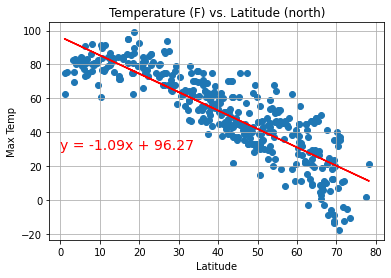

In [63]:
#Set up linear regression and line equation
x_values = weather_df_north['Latitude']
y_values = weather_df_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(0,30),fontsize=14,color="red")
plt.grid()
plt.title('Temperature (F) vs. Latitude (north)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

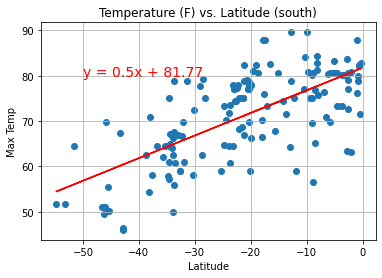

The high r value indicates a strong positive correlation between lattitude and max temperature.


In [64]:
#Set up linear regression and line equation
x_values = weather_df_south['Latitude']
y_values = weather_df_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(-50,80),fontsize=14,color="red")
plt.grid()
plt.title('Temperature (F) vs. Latitude (south)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print("The high r value indicates a strong positive correlation between lattitude and max temperature.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

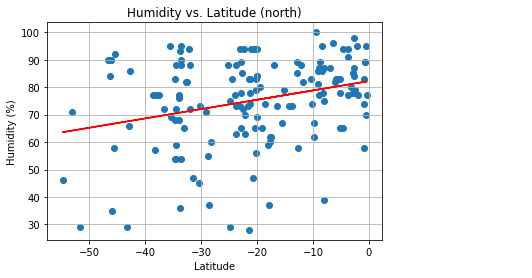

The high r value indicates a strong positive correlation....


In [65]:
x_values = weather_df_north['Latitude']
y_values = weather_df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(5,20),fontsize=15,color="red")
plt.grid()
plt.title('Humidity vs. Latitude (north)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

print("The high r value indicates a strong positive correlation....")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


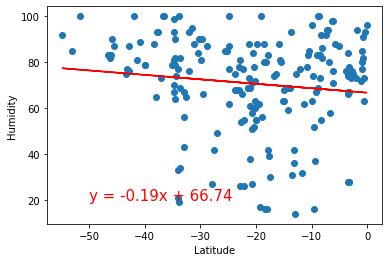

In [28]:
x_values = weather_df_north['Latitude']
y_values = weather_df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(5,20),fontsize=15,color="red")
plt.grid()
plt.title('Humidity vs. Latitude (north)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

print("The high r value indicates a strong positive correlation....")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

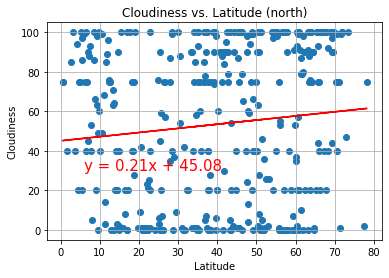

The high r value indicates a strong positive correlation....


In [14]:
x_values = weather_df_north['Latitude']
y_values = weather_df_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(6,30),fontsize=15,color="red")
plt.grid()
plt.title('Cloudiness vs. Latitude (north)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print("The high r value indicates a strong positive correlation....")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

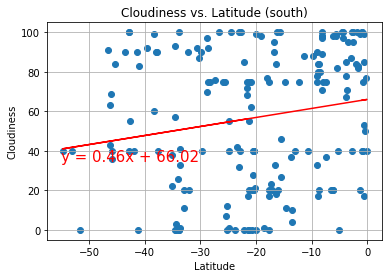

The high r value indicates a strong positive correlation....


In [17]:
x_values = weather_df_south['Latitude']
y_values = weather_df_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(-55,35),fontsize=15,color="red")
plt.grid()
plt.title('Cloudiness vs. Latitude (south)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print("The high r value indicates a strong positive correlation....")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

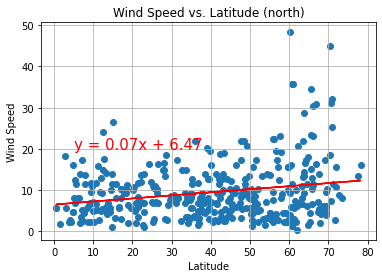

The high r value indicates a strong positive correlation....


In [22]:
x_values = weather_df_north['Latitude']
y_values = weather_df_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(5,20),fontsize=15,color="red")
plt.grid()
plt.title('Wind Speed vs. Latitude (north)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print("The high r value indicates a strong positive correlation....")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

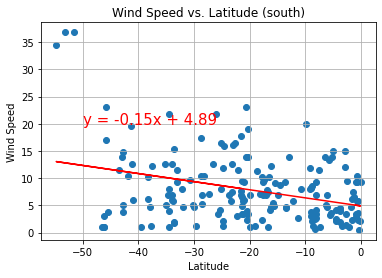

The high r value indicates a strong positive correlation....


In [23]:
x_values = weather_df_south['Latitude']
y_values = weather_df_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(-50,20),fontsize=15,color="red")
plt.grid()
plt.title('Wind Speed vs. Latitude (south)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print("The high r value indicates a strong positive correlation....")